#Practical Work 3

In [0]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import time

In [0]:
#upload 'airports.csv'
from google.colab import files
uploaded = files.upload()

Saving airports.csv to airports.csv


In [0]:
# !rm filename

In [0]:
def graph(dataframe,col1,col2):
  G = nx.from_pandas_edgelist(dataframe, source=col1, target=col2,edge_attr=True, create_using=nx.DiGraph) # NEW
  return G

def draw_Graph(graph,color='salmon'):
  plt.figure(figsize=(12,6.5))
  nx.draw_networkx(graph,node_color=color,with_labels=True)
  plt.show()

In [0]:
df=pd.read_csv("airports.csv")
df

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,AirTime,Origin,Dest,Distance
0,2008,1,3,4,2003.0,1955,2211.0,2225,116.0,IAD,TPA,810
1,2008,1,3,4,754.0,735,1002.0,1000,113.0,IAD,TPA,810
2,2008,1,3,4,628.0,620,804.0,750,76.0,IND,BWI,515
3,2008,1,3,4,926.0,930,1054.0,1100,78.0,IND,BWI,515
4,2008,1,3,4,1829.0,1755,1959.0,1925,77.0,IND,BWI,515
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2008,1,18,5,1206.0,1200,1713.0,1705,172.0,LAX,HOU,1390
49996,2008,1,18,5,807.0,810,1306.0,1315,170.0,LAX,HOU,1390
49997,2008,1,18,5,1834.0,1815,1933.0,1920,45.0,LAX,LAS,236
49998,2008,1,18,5,725.0,725,821.0,825,42.0,LAX,LAS,236


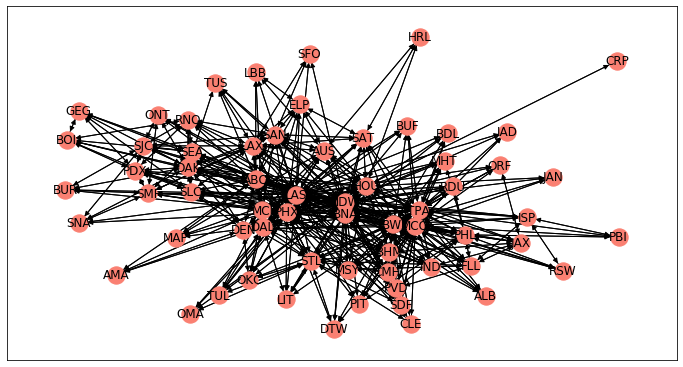

In [0]:
G=graph(df,'Origin','Dest')
draw_Graph(G)

###Bellman-Ford algorithm

In [0]:
# Return list of shortest paths from source to other nodes 
def BellmanFord(graph,source,attribute):
  list=[v for v in graph.nodes]  
 
  # Step 1: initialize graph
  distance=[float('inf')]*len(graph.nodes)

  distance[list.index(source)]=0
  # Step 2: relax edges repeatedly
  for i in range(len(graph.nodes)-1):
    for edge in graph.edges():
      u=list.index(edge[0])
      v=list.index(edge[1])
      w=graph.edges[edge[0],edge[1]][attribute]
      if distance[u] + w < distance[v]:
        distance[v] = distance[u] + w
   
  #  Step 3: check for negative-weight cycles
  for edge in graph.edges():
    u=list.index(edge[0])
    v=list.index(edge[1])
    w=graph.edges[edge[0],edge[1]][attribute]
    if distance[u] + w < distance[v]:
      # error "Graph contains a negative-weight cycle"
      distance[v]=float('-inf')
  
  return distance

In [0]:
def print_func(graph,source,dest,attr,shortpath):
  list=[v for v in graph.nodes]  
  for i in range(len(list)):
    if list[i]==dest: # if we remove this line, this function will print all shortest paths from source to other nodes 
      print('from',source,'to',list[i],attr,':',shortpath[i])

In [0]:
source='CRP'
dest='BOI'
attr='Distance' # 'AirTime'

start=time.time()
shortest_paths=BellmanFord(G,source,attr)
print_func(G,source,dest,attr,shortest_paths)
comp_t=time.time()-start
print("Computation time:",comp_t)

from CRP to BOI Distance : 1730
Computation time: 0.148406982421875


###Dijkstra's algorithm

In [0]:
def node_minDistance(q,l,dist):
  min=float('inf')
  for v in q:
    if dist[l.index(v)]<min:
      min=dist[l.index(v)]
      node=v
  return node

In [0]:
# Return list of shortest paths from source to other nodes 
def Dijkstra(graph,source,attr):

  l=[v for v in graph.nodes]        
  dist=[float('inf')]*len(graph.nodes)        
  q=[v for v in graph.nodes]  
  dist[l.index(source)]=0                        
  
  while len(q)>0:
    u=node_minDistance(q,l,dist)    
    q.remove(u) 
    for v in  list(graph.neighbors(u)):
      w=graph.edges[u,v][attr]           
      length = dist[l.index(u)]+w
      if length < dist[l.index(v)]:               
        dist[l.index(v)]=length
    
  return dist

In [0]:
start=time.time()
shortest_paths=Dijkstra(G,source,attr)
print_func(G,source,dest,attr,shortest_paths)
comp_t=time.time()-start
print("Computation time:",comp_t)

from CRP to BOI Distance : 1730
Computation time: 0.0071985721588134766
